### Part 1 Designing Certificates ###
I created a product that embeds a double-knockout and a net short position to trade the elections, inspired by the uncertainties that unravelled across Mexico and India in 2024

#### 1.1 Product design ####
*Design a marketable structured product consisting of at least two components. Explain the intuition behind your product and describe the components briefly*

This structured product is meant to trade around elections. Its inspiration is derived
from recent elections and their results. For example, the landslide presidential victory
by Claudia Sheinbaum in Mexico led to a fall in the Mexican IPC index by 6%
(Luhnow et al., 2024). Likewise, the narrow victory by India’s Modi led to a 5.7%
decline in the Indian Sensex Index. Overall, this is a play on the elections, from the
sudden French parliamentary elections and British general elections, to the US
presidential elections in November.
This product is two-tiered: (1) a double-knockout clause within a range containing a
butterfly spread (short call short put), and (2) two barriers outside of the knockout
region that trade a net-short position (long put financed by a short call). Overall, the
strategy assumes elections are ‘priced’ and should lead to little volatility but also has a
bear case it could capitalize on. At inception, this product is at profit from options sold
within the knockout region.

#### 1.2 Product payoff ####
*Illustrate the payoff profile and the market situation(s) under which the product does (and does not) outperform its underlying in a reasonable graphic.*

The payoff profile is separated into 4 sections representing 4 different scenario: (1)
gains from premiums on the $80-120 range, (2) no payoff during the $60-80 and $120-
140 region, (3) a continuous gain below $60, and (4) a continuous loss above $140.
Furthermore, the long puts with a strike at $80 but a barrier at $60 will be financed by
short calls with a strike of $120 but a barrier at $140. Overall, the payoff profile is
asymmetrical except for the center. For (1), if the elections are well-priced, the market
should fluctuate very little, so we are net negative in terms of payoff but positive in
profit net of option premiums. This is because we sold ITM options, so we mostly earn
the time value of the options. For (2) the knockout barriers knockout the buyers, so we
profit the premiums and outperform the underlying. In (3) if the underlying falls below a
range (here $60), this will make us ITM, and given the levered nature of the put, we
outperform the underlying.

#### 1.3 Volume & Target group ####
*Justify a realistic estimate of the total volume of your product that you can sell (e.g., through market research of similar products and market share potential). Explain how the volume changes depending on the market condition and the investor’s demand. Also define the target buyer group of your product. Explain the characteristics of potential buyers (e.g., understanding of risk, income orientation, regulatory conditions) and focus on the needs and advantages potential buyers seek, which your product provides.*

The target group for the product are institutional investors or accredited
investors without a general view of the elections. The risk is substantial
because of how tight the spreads are and the sophistication required to
understand it. The advantages of this product is that at inception investors are
already in profit. This is good for investors who perhaps do not want to place a
clear, directional bet but can close their position later on and take on a
directional bet. Thus, flexibility is a major advantage. Another advantage is the
tailored aspects of the product; that is, given the general political climate and
the recent, unforeseen shift in politics across the world, that they may be able
to capitalize on potential, underestimated tail risk. Volume-wise, based on
historical 2016 and 2020 US elections option data, I estimate the volume for
this product (barrier longs and puts), to be ~9.6tn USD. This is in line with dte
options volume (~1tn/day from WSJ). Further, volume for this will be largely
affected by uncertainty and demand dynamics. In 2020, for example, puts
made up 7/10 of the top 10 non-complex trades, representing significant
demand for downside protection. The match was even between Trump and
Biden, yet ultimate uncertainty on its outcome and future tax & economic laws
was sufficient to ask for significant put protection

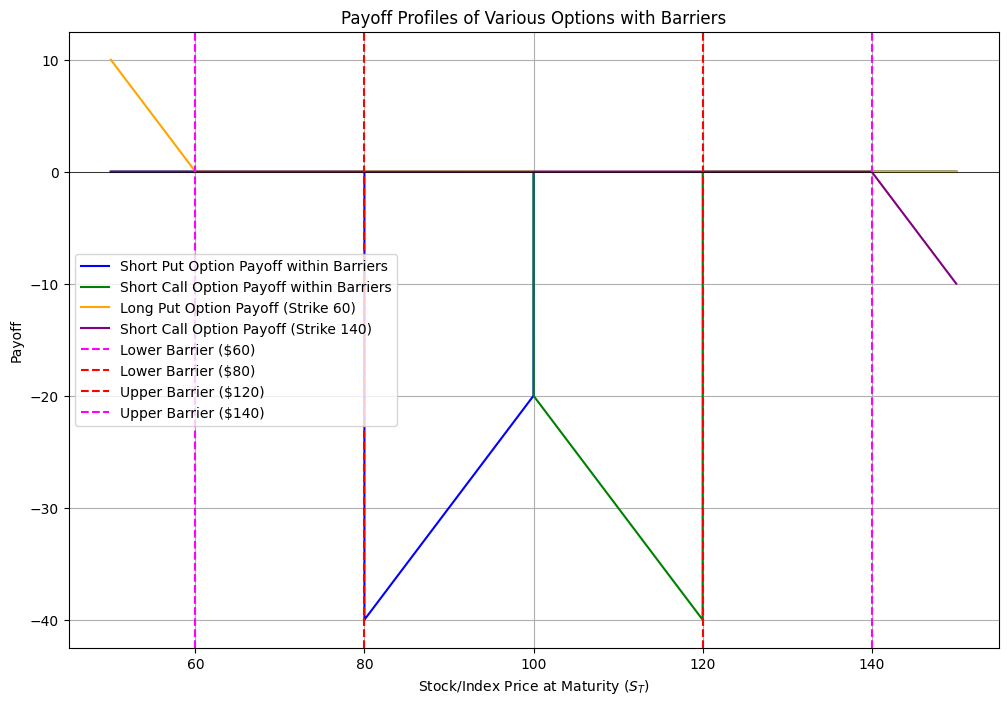

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
strike_price_short_put = 120
strike_price_short_call = 80
strike_price_long_put = 60
strike_price_short_call_140 = 140
upper_barrier1 = 120
lower_barrier1 = 80
upper_barrier2 = 140
lower_barrier2 = 60
S_T = np.linspace(50, 150, 99999)  # Range of possible prices at maturity

# Midpoint of the knockout region
midpoint = (upper_barrier1 + lower_barrier1) / 2

# Payoff calculation for short put option within the knockout barriers
short_put_payoff = np.where(
    (S_T <= upper_barrier1) & (S_T >= lower_barrier1),
    np.where(S_T < midpoint, -np.maximum(strike_price_short_put - S_T, 0), 0),
    0
)

# Payoff calculation for short call option within the knockout barriers
short_call_payoff = np.where(
    (S_T <= upper_barrier1) & (S_T >= lower_barrier1),
    np.where(S_T > midpoint, -np.maximum(S_T - strike_price_short_call, 0), 0),
    0
)

# Payoff calculation for long put option with strike of 60
long_put_payoff = np.maximum(strike_price_long_put - S_T, 0)

# Payoff calculation for short call option with strike of 140, activated only if S_T >= 140
short_call_140_payoff = np.where(S_T >= upper_barrier2, -np.maximum(S_T - strike_price_short_call_140, 0), 0)

# Total payoff
total_payoff = short_put_payoff + short_call_payoff + long_put_payoff + short_call_140_payoff

# Plot
plt.figure(figsize=(12, 8))

# Plot short put option payoff
plt.plot(S_T, short_put_payoff, label='Short Put Option Payoff within Barriers', color='blue')

# Plot short call option payoff
plt.plot(S_T, short_call_payoff, label='Short Call Option Payoff within Barriers', color='green')

# Plot long put option payoff
plt.plot(S_T, long_put_payoff, label='Long Put Option Payoff (Strike 60)', color='orange')

# Plot short call option payoff (Strike 140)
plt.plot(S_T, short_call_140_payoff, label='Short Call Option Payoff (Strike 140)', color='purple')


# Barrier levels
plt.axvline(x=lower_barrier2, color='magenta', linestyle='--', label='Lower Barrier ($60)')
plt.axvline(x=lower_barrier1, color='red', linestyle='--', label='Lower Barrier ($80)')
plt.axvline(x=upper_barrier1, color='red', linestyle='--', label='Upper Barrier ($120)')
plt.axvline(x=upper_barrier2, color='magenta', linestyle='--', label='Upper Barrier ($140)')


# Formatting the plot
plt.axhline(y=0, color='black', linewidth=0.5)
plt.xlabel('Stock/Index Price at Maturity ($S_T$)')
plt.ylabel('Payoff')
plt.title('Payoff Profiles of Various Options with Barriers')
plt.legend()
plt.grid(True)
plt.show()